<a href="https://colab.research.google.com/github/neriandria/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
pip install numpy pandas scikit-learn

In [198]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv("Adult data.csv")

In [200]:
df.head()

Age          Workclass  Fnlwgt   Education  Education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital-status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital-gain  Capital-loss  Hours-per-week  Native-country  Income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [202]:
df.describe()

Age        Fnlwgt  Education-num  Capital-gain  Capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [203]:
# Removiing 'Fnlwgt' column from the dataset
df.drop(columns=['Fnlwgt'], inplace=True)

In [204]:
#Find rows with "?" values in Adult dataset
question_mark_rows = df[df.apply(lambda row: row.astype(str).str.contains('\?')).any(axis=1)]

print("Rows with '?' values in Adult dataset:")
print(question_mark_rows)

Rows with '?' values in Adult dataset:
       Age Workclass      Education  Education-num          Marital-status  \
14      40   Private      Assoc-voc             11      Married-civ-spouse   
27      54         ?   Some-college             10      Married-civ-spouse   
38      31   Private   Some-college             10      Married-civ-spouse   
51      18   Private        HS-grad              9           Never-married   
61      32         ?        7th-8th              4   Married-spouse-absent   
...    ...       ...            ...            ...                     ...   
32530   35         ?      Bachelors             13      Married-civ-spouse   
32531   30         ?      Bachelors             13           Never-married   
32539   71         ?      Doctorate             16      Married-civ-spouse   
32541   41         ?        HS-grad              9               Separated   
32542   72         ?        HS-grad              9      Married-civ-spouse   

           Occupation   

In [205]:
# Check for null values and show details
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Age               0
Workclass         0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64


In [206]:
# Replace "?" values with mode of respective columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = df[column].replace(' ?', df[column].mode()[0])


In [207]:
print(df)
print(df.isnull().sum())


       Age          Workclass    Education  Education-num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            Marital-status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

In [208]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Income'])
y = df['Income']

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [209]:
# Encode 'Income' column as True for '<=50K' and False for '>50K'
df['Income'] = df['Income'].astype(str).apply(lambda x: x.strip() == '<=50K')

In [210]:
print(df.head())

   Age          Workclass   Education  Education-num       Marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   Capital-loss  Hours-per-week  Native-country  Income  
0             0              40   United-State

In [211]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Print duplicate rows
print("Duplicate Rows:")
print(df[duplicate_rows])

# Remove duplicate rows
df_cleaned = df[~duplicate_rows]

# Print information about removed duplicates
print("\nNumber of duplicate rows removed:", sum(duplicate_rows))
print("Shape of the cleaned dataset:", df_cleaned.shape)


Duplicate Rows:
       Age Workclass      Education  Education-num       Marital-status  \
352     33   Private      Bachelors             13   Married-civ-spouse   
391     27   Private      Bachelors             13        Never-married   
563     24   Private        HS-grad              9        Never-married   
570     24   Private        HS-grad              9        Never-married   
673     33   Private      Bachelors             13   Married-civ-spouse   
...    ...       ...            ...            ...                  ...   
32503   47   Private        HS-grad              9   Married-civ-spouse   
32512   20   Private        HS-grad              9        Never-married   
32527   22   Private   Some-college             10        Never-married   
32557   40   Private        HS-grad              9   Married-civ-spouse   
32559   22   Private        HS-grad              9        Never-married   

               Occupation    Relationship    Race      Sex  Capital-gain  \
352    

In [212]:
df.describe()

Age  Education-num  Capital-gain  Capital-loss  Hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

In [213]:
from scipy.stats import zscore

# Get numerical columns based on their data types
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Filter rows where any Z-score exceeds the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Display the outliers
print("Outliers:")
print(outliers)

# Remove outliers from the dataset
df_cleaned = df.drop(outliers.index)

# Display the shape of the original and cleaned datasets
print("\nOriginal dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Outliers:
       Age   Workclass      Education  Education-num       Marital-status  \
10      37     Private   Some-college             10   Married-civ-spouse   
23      43     Private           11th              7   Married-civ-spouse   
28      39     Private        HS-grad              9             Divorced   
32      45     Private      Bachelors             13             Divorced   
52      47     Private    Prof-school             15   Married-civ-spouse   
...    ...         ...            ...            ...                  ...   
32476   35     Private           12th              8   Married-civ-spouse   
32494   82     Private        HS-grad              9        Never-married   
32518   57   Local-gov        HS-grad              9   Married-civ-spouse   
32525   81     Private      Assoc-voc             11             Divorced   
32531   30     Private      Bachelors             13        Never-married   

              Occupation    Relationship                 Race    

In [214]:
# Assuming df contains your preprocessed data

# Define features (X) and target (y)
X = df.drop('Income', axis=1)  # Features are all columns except 'Income'
y = df['Income']  # Target is the 'Income' column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
# Random Forest Classification
# One-hot encode categorical variables for both training and testing sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of the testing set with the columns of the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train the RandomForestClassifier
rf_classifier.fit(X_train_encoded, y_train)

# Predictions
rf_pred = rf_classifier.predict(X_test_encoded)

# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.64      0.67      1571
        True       0.89      0.92      0.90      4942

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.84      0.85      0.85      6513

Random Forest Accuracy: 0.8481498541378781


In [216]:
# Model training
# Naïve Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the Naïve Bayes classifier
nb_classifier.fit(X_train_encoded, y_train)

# Predictions
nb_pred = nb_classifier.predict(X_test_encoded)

# Evaluation
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.82      0.67      1571
        True       0.93      0.80      0.86      4942

    accuracy                           0.81      6513
   macro avg       0.75      0.81      0.77      6513
weighted avg       0.85      0.81      0.82      6513

Naïve Bayes Accuracy: 0.8062336864732075


### Boxplots

Income range by gender

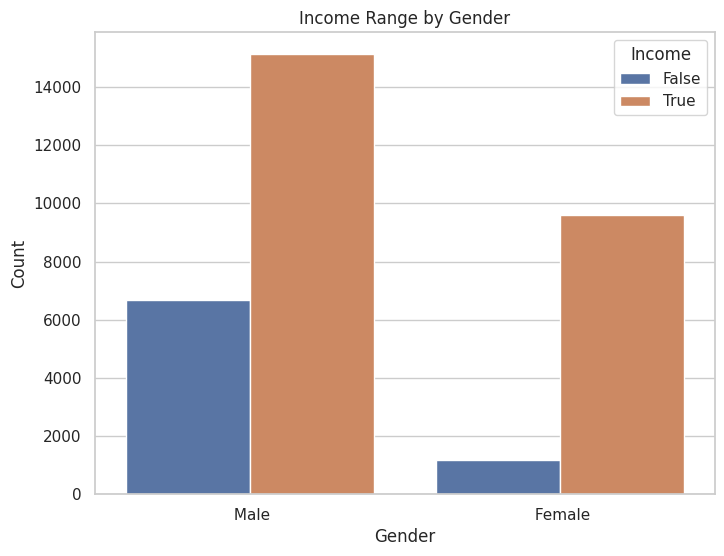

In [217]:
#True income >=50
#False income <=50
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Income')
plt.title('Income Range by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Distributions of ages

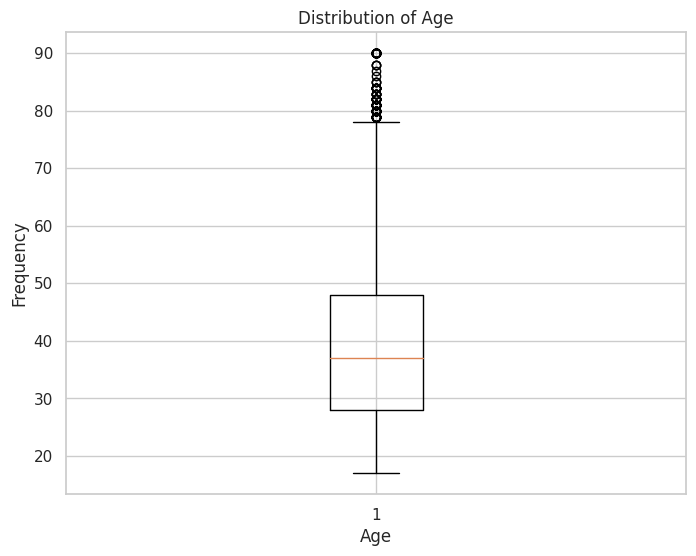

In [218]:
import matplotlib.pyplot as plt

# A boxplot for the 'Age' variable
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Distribution of education levels across different countries

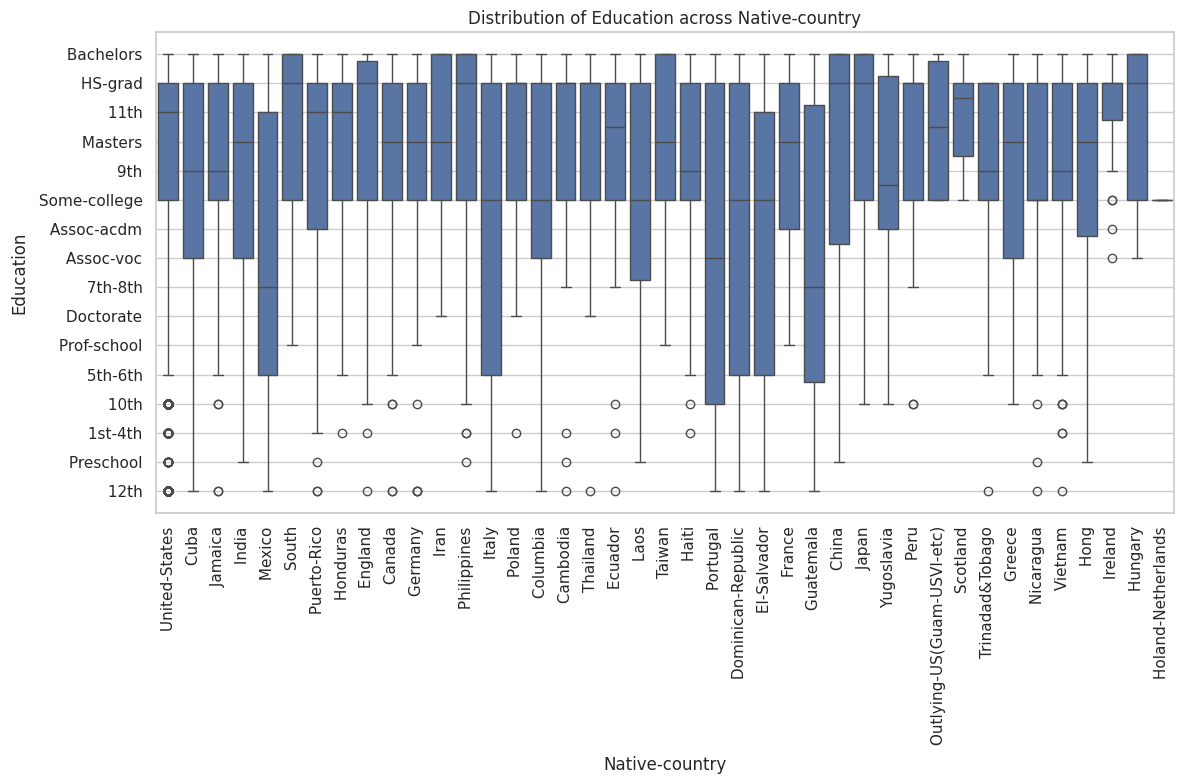

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# A boxplot for Education across Native-country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Native-country', y='Education', data=df)
plt.title('Distribution of Education across Native-country')
plt.xlabel('Native-country')
plt.ylabel('Education')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
